In [4]:
import numpy as np
np.__version__

'1.19.2'

In [5]:
x = np.array([[1,2,3],[2,3,4],[3,4,5],[4,5,6]])
y = np.array([4,5,6,7])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(3,1)))
model.add(Dense(5))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense (Dense)                (None, 5)                 55        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [6]:
print(x.shape)
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)
x

(4, 3)
(4, 3, 1)


array([[[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]],

       [[4],
        [5],
        [6]]])

In [7]:
nd1 = np.array([1,2,3])
nd2 = np.array([[1],[2],[3]])
print(nd1[0],nd2[0])

1 [1]


In [8]:
model.compile(optimizer='adam', loss="mse")
model.fit(x, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 0s/step - loss: 41.4346
Epoch 2/500
1/1 [==============================] - 0s 998us/step - loss: 41.0394
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 40.6500
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 40.2664
Epoch 5/500
1/1 [==============================] - 0s 999us/step - loss: 39.8893
Epoch 6/500
1/1 [==============================] - 0s 998us/step - loss: 39.5192
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 39.1546
Epoch 8/500
1/1 [==============================] - 0s 999us/step - loss: 38.7954
Epoch 9/500
1/1 [==============================] - 0s 0s/step - loss: 38.4416
Epoch 10/500
1/1 [==============================] - 0s 1000us/step - loss: 38.0929
Epoch 11/500
1/1 [==============================] - 0s 1000us/step - loss: 37.7494
Epoch 12/500
1/1 [==============================] - 0s 996us/step - loss: 37.4113
Epoch 13/500
1/1 [=================

1/1 [==============================] - 0s 1000us/step - loss: 0.7988
Epoch 204/500
1/1 [==============================] - 0s 0s/step - loss: 0.7969
Epoch 205/500
1/1 [==============================] - 0s 1ms/step - loss: 0.7950
Epoch 206/500
1/1 [==============================] - 0s 1000us/step - loss: 0.7931
Epoch 207/500
1/1 [==============================] - 0s 999us/step - loss: 0.7912
Epoch 208/500
1/1 [==============================] - 0s 0s/step - loss: 0.7894
Epoch 209/500
1/1 [==============================] - 0s 0s/step - loss: 0.7876
Epoch 210/500
1/1 [==============================] - 0s 0s/step - loss: 0.7859
Epoch 211/500
1/1 [==============================] - 0s 999us/step - loss: 0.7842
Epoch 212/500
1/1 [==============================] - 0s 1ms/step - loss: 0.7824
Epoch 213/500
1/1 [==============================] - 0s 0s/step - loss: 0.7807
Epoch 214/500
1/1 [==============================] - 0s 1000us/step - loss: 0.7791
Epoch 215/500
1/1 [===========================

1/1 [==============================] - 0s 999us/step - loss: 0.4636
Epoch 406/500
1/1 [==============================] - 0s 0s/step - loss: 0.4620
Epoch 407/500
1/1 [==============================] - 0s 0s/step - loss: 0.4604
Epoch 408/500
1/1 [==============================] - 0s 999us/step - loss: 0.4588
Epoch 409/500
1/1 [==============================] - 0s 997us/step - loss: 0.4572
Epoch 410/500
1/1 [==============================] - 0s 0s/step - loss: 0.4556
Epoch 411/500
1/1 [==============================] - 0s 1ms/step - loss: 0.4541
Epoch 412/500
1/1 [==============================] - 0s 1ms/step - loss: 0.4525
Epoch 413/500
1/1 [==============================] - 0s 1ms/step - loss: 0.4509
Epoch 414/500
1/1 [==============================] - 0s 1ms/step - loss: 0.4493
Epoch 415/500
1/1 [==============================] - 0s 0s/step - loss: 0.4477
Epoch 416/500
1/1 [==============================] - 0s 999us/step - loss: 0.4462
Epoch 417/500
1/1 [==============================]

In [9]:
pred = model.predict(x)
pred

array([[3.1708841],
       [4.461228 ],
       [5.934978 ],
       [7.542647 ]], dtype=float32)

In [10]:
pred = model.predict([[[6],[7],[8]]])
pred

array([[10.964226]], dtype=float32)

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import utils

data = list("hihello")
print(data)
token = Tokenizer()
token.fit_on_texts(data)
print(token.word_index)
x = token.texts_to_sequences(data)
print(x)
padded_x = pad_sequences(x,1)
print(padded_x)
one_hot = utils.to_categorical(padded_x)
print(one_hot)

['h', 'i', 'h', 'e', 'l', 'l', 'o']
{'h': 1, 'l': 2, 'i': 3, 'e': 4, 'o': 5}
[[1], [3], [1], [4], [2], [2], [5]]
[[1]
 [3]
 [1]
 [4]
 [2]
 [2]
 [5]]
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [12]:
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(6,6)))
model.add(LSTM(12, return_sequences=True))
model.add(Dense(6, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6, 12)             912       
_________________________________________________________________
dense_2 (Dense)              (None, 6, 6)              78        
Total params: 990
Trainable params: 990
Non-trainable params: 0
_________________________________________________________________


In [13]:
print(one_hot[:6])
print(one_hot[1:])

[[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [14]:
x_data = one_hot[:6]
x_data = x_data.reshape(1, x_data.shape[0], x_data.shape[1])
print(x_data.shape)
x_data

(1, 6, 6)


array([[[0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.]]], dtype=float32)

In [15]:
y_data = one_hot[1:]
y_data = y_data.reshape(1, y_data.shape[0], y_data.shape[1])
print(y_data.shape)
y_data

(1, 6, 6)


array([[[0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.]]], dtype=float32)

In [16]:
model.fit(x_data, y_data, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 16ms/step - loss: 0.6960 - accuracy: 0.1667
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.1667
Epoch 3/500
1/1 [==============================] - 0s 993us/step - loss: 0.6933 - accuracy: 0.1667
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.1667
Epoch 5/500
1/1 [==============================] - 0s 996us/step - loss: 0.6906 - accuracy: 0.1667
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.1667
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.1667
Epoch 8/500
1/1 [==============================] - 0s 998us/step - loss: 0.6865 - accuracy: 0.1667
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.1667
Epoch 10/500
1/1 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.1667
Epoch 11/500
1/1 [====

1/1 [==============================] - 0s 999us/step - loss: 0.5295 - accuracy: 0.3333
Epoch 85/500
1/1 [==============================] - 0s 1ms/step - loss: 0.5266 - accuracy: 0.3333
Epoch 86/500
1/1 [==============================] - 0s 1ms/step - loss: 0.5236 - accuracy: 0.3333
Epoch 87/500
1/1 [==============================] - 0s 995us/step - loss: 0.5207 - accuracy: 0.3333
Epoch 88/500
1/1 [==============================] - 0s 1ms/step - loss: 0.5178 - accuracy: 0.3333
Epoch 89/500
1/1 [==============================] - 0s 1ms/step - loss: 0.5149 - accuracy: 0.3333
Epoch 90/500
1/1 [==============================] - 0s 1000us/step - loss: 0.5121 - accuracy: 0.3333
Epoch 91/500
1/1 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.3333
Epoch 92/500
1/1 [==============================] - 0s 999us/step - loss: 0.5064 - accuracy: 0.3333
Epoch 93/500
1/1 [==============================] - 0s 999us/step - loss: 0.5036 - accuracy: 0.3333
Epoch 94/500
1/1 [====

1/1 [==============================] - 0s 1ms/step - loss: 0.3439 - accuracy: 0.3333
Epoch 249/500
1/1 [==============================] - 0s 994us/step - loss: 0.3433 - accuracy: 0.3333
Epoch 250/500
1/1 [==============================] - 0s 1ms/step - loss: 0.3427 - accuracy: 0.3333
Epoch 251/500
1/1 [==============================] - 0s 1ms/step - loss: 0.3422 - accuracy: 0.3333
Epoch 252/500
1/1 [==============================] - 0s 1ms/step - loss: 0.3416 - accuracy: 0.3333
Epoch 253/500
1/1 [==============================] - 0s 0s/step - loss: 0.3410 - accuracy: 0.3333
Epoch 254/500
1/1 [==============================] - 0s 1ms/step - loss: 0.3404 - accuracy: 0.3333
Epoch 255/500
1/1 [==============================] - 0s 1ms/step - loss: 0.3398 - accuracy: 0.3333
Epoch 256/500
1/1 [==============================] - 0s 1000us/step - loss: 0.3392 - accuracy: 0.3333
Epoch 257/500
1/1 [==============================] - 0s 1ms/step - loss: 0.3386 - accuracy: 0.3333
Epoch 258/500
1/1 [=

1/1 [==============================] - 0s 1ms/step - loss: 0.2451 - accuracy: 0.8333
Epoch 413/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2446 - accuracy: 0.8333
Epoch 414/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2441 - accuracy: 0.8333
Epoch 415/500
1/1 [==============================] - 0s 998us/step - loss: 0.2435 - accuracy: 0.8333
Epoch 416/500
1/1 [==============================] - 0s 1000us/step - loss: 0.2430 - accuracy: 0.8333
Epoch 417/500
1/1 [==============================] - 0s 0s/step - loss: 0.2425 - accuracy: 0.8333
Epoch 418/500
1/1 [==============================] - 0s 999us/step - loss: 0.2420 - accuracy: 0.8333
Epoch 419/500
1/1 [==============================] - 0s 998us/step - loss: 0.2415 - accuracy: 0.8333
Epoch 420/500
1/1 [==============================] - 0s 0s/step - loss: 0.2410 - accuracy: 0.8333
Epoch 421/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2405 - accuracy: 0.8333
Epoch 422/500
1/1

In [17]:
pred = model.predict(x_data)
np.argmax(pred, axis=2)

array([[1, 1, 4, 2, 2, 5]], dtype=int64)

In [18]:
[token.index_word[ind] for ind in np.argmax(pred, axis=2)[0]]

['h', 'h', 'e', 'l', 'l', 'o']

In [19]:
docs = ["나는 당신을 사랑합니다.",
        "나는 당신을 미워합니다.",
        "i love you.",
        "i hate you."]

token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

{'나는': 1, '당신을': 2, 'i': 3, 'you': 4, '사랑합니다': 5, '미워합니다': 6, 'love': 7, 'hate': 8}


In [20]:
x = token.texts_to_sequences(docs)
print(x)

[[1, 2, 5], [1, 2, 6], [3, 7, 4], [3, 8, 4]]


In [21]:
padded_x = pad_sequences(x,3)
print(padded_x)

[[1 2 5]
 [1 2 6]
 [3 7 4]
 [3 8 4]]


In [22]:
one_hot = utils.to_categorical(padded_x)
print(one_hot)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]]

 [[0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]]

 [[0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]]]


In [23]:
x_data = one_hot[:2]
print(x_data)
y_data = one_hot[2:]

[[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]]]


In [27]:
print(x_data.shape, y_data.shape)

(2, 3, 9) (2, 3, 9)


In [25]:
from tensorflow.keras.layers import Bidirectional
model = Sequential()
model.add(Input(shape=(3,9)))
model.add(Bidirectional(LSTM(18, return_sequences=True)))
model.add(Bidirectional(LSTM(36, return_sequences=True)))
model.add(Dense(36, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 3, 36)             4032      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 3, 72)             21024     
_________________________________________________________________
dense_3 (Dense)              (None, 3, 36)             2628      
_________________________________________________________________
dense_4 (Dense)              (None, 3, 18)             666       
_________________________________________________________________
dense_5 (Dense)              (None, 3, 9)              171       
Total params: 28,521
Trainable params: 28,521
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6940 - accuracy: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 996us/step - loss: 0.6921 - accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 996us/step - loss: 0.6903 - accuracy: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 996us/step - loss: 0.6868 - accuracy: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.0000e+00
Epoch 8/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.0000e+00
Epoch 9/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6800 - accuracy: 0.0000e+00
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.678

1/1 [==============================] - 0s 999us/step - loss: 0.3337 - accuracy: 0.0000e+00
Epoch 81/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3285 - accuracy: 0.0000e+00
Epoch 82/1000
1/1 [==============================] - 0s 0s/step - loss: 0.3235 - accuracy: 0.3333
Epoch 83/1000
1/1 [==============================] - 0s 999us/step - loss: 0.3186 - accuracy: 0.3333
Epoch 84/1000
1/1 [==============================] - 0s 999us/step - loss: 0.3136 - accuracy: 0.3333
Epoch 85/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3085 - accuracy: 0.3333
Epoch 86/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3032 - accuracy: 0.3333
Epoch 87/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2978 - accuracy: 0.3333
Epoch 88/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2923 - accuracy: 0.3333
Epoch 89/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2867 - accuracy: 0.3333
Epoch 90/100

1/1 [==============================] - 0s 1ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 242/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 243/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 244/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 245/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 246/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 247/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0058 - accuracy: 1.0000
Epoch 248/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 249/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 250/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0055 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 999us/step - loss: 9.8449e-04 - accuracy: 1.0000
Epoch 404/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.7635e-04 - accuracy: 1.0000
Epoch 405/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.6987e-04 - accuracy: 1.0000
Epoch 406/1000
1/1 [==============================] - 0s 0s/step - loss: 9.6129e-04 - accuracy: 1.0000
Epoch 407/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.5171e-04 - accuracy: 1.0000
Epoch 408/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.4560e-04 - accuracy: 1.0000
Epoch 409/1000
1/1 [==============================] - 0s 0s/step - loss: 9.3824e-04 - accuracy: 1.0000
Epoch 410/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.2914e-04 - accuracy: 1.0000
Epoch 411/1000
1/1 [==============================] - 0s 997us/step - loss: 9.2115e-04 - accuracy: 1.0000
Epoch 412/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.1

1/1 [==============================] - 0s 1ms/step - loss: 3.3972e-04 - accuracy: 1.0000
Epoch 560/1000
1/1 [==============================] - 0s 998us/step - loss: 3.3781e-04 - accuracy: 1.0000
Epoch 561/1000
1/1 [==============================] - 0s 999us/step - loss: 3.3591e-04 - accuracy: 1.0000
Epoch 562/1000
1/1 [==============================] - 0s 999us/step - loss: 3.3417e-04 - accuracy: 1.0000
Epoch 563/1000
1/1 [==============================] - 0s 998us/step - loss: 3.3219e-04 - accuracy: 1.0000
Epoch 564/1000
1/1 [==============================] - 0s 1000us/step - loss: 3.3048e-04 - accuracy: 1.0000
Epoch 565/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.2873e-04 - accuracy: 1.0000
Epoch 566/1000
1/1 [==============================] - 0s 0s/step - loss: 3.2707e-04 - accuracy: 1.0000
Epoch 567/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.2522e-04 - accuracy: 1.0000
Epoch 568/1000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 999us/step - loss: 1.6485e-04 - accuracy: 1.0000
Epoch 715/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.6419e-04 - accuracy: 1.0000
Epoch 716/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.6351e-04 - accuracy: 1.0000
Epoch 717/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.6288e-04 - accuracy: 1.0000
Epoch 718/1000
1/1 [==============================] - 0s 0s/step - loss: 1.6223e-04 - accuracy: 1.0000
Epoch 719/1000
1/1 [==============================] - 0s 0s/step - loss: 1.6158e-04 - accuracy: 1.0000
Epoch 720/1000
1/1 [==============================] - 0s 1000us/step - loss: 1.6098e-04 - accuracy: 1.0000
Epoch 721/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.6033e-04 - accuracy: 1.0000
Epoch 722/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.5973e-04 - accuracy: 1.0000
Epoch 723/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.

1/1 [==============================] - 0s 1ms/step - loss: 9.5449e-05 - accuracy: 1.0000
Epoch 871/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.5155e-05 - accuracy: 1.0000
Epoch 872/1000
1/1 [==============================] - 0s 0s/step - loss: 9.4866e-05 - accuracy: 1.0000
Epoch 873/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.4566e-05 - accuracy: 1.0000
Epoch 874/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.4294e-05 - accuracy: 1.0000
Epoch 875/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.3992e-05 - accuracy: 1.0000
Epoch 876/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.3704e-05 - accuracy: 1.0000
Epoch 877/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.3409e-05 - accuracy: 1.0000
Epoch 878/1000
1/1 [==============================] - 0s 999us/step - loss: 9.3149e-05 - accuracy: 1.0000
Epoch 879/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.28

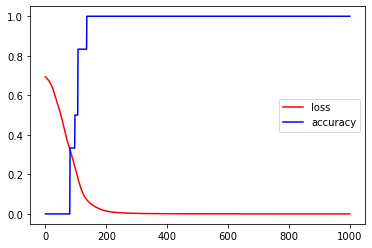

In [27]:
import matplotlib.pyplot as plt
y_loss = history.history['loss']
y_acc = history.history['accuracy']
plt.plot(np.arange(len(y_loss)), y_loss, c="red", label="loss")
plt.plot(np.arange(len(y_acc)), y_acc, c="blue", label="accuracy")
plt.legend(loc="best")
plt.show()

In [28]:
y_hat = model.predict(x_data)
np.argmax(y_hat, axis=2)

array([[3, 7, 4],
       [3, 8, 4]], dtype=int64)

In [29]:
from tensorflow.keras.layers import Bidirectional
model = Sequential()
model.add(Input(shape=(3,9)))
model.add(Bidirectional(LSTM(18, return_sequences=True)))
model.add(Dense(9, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 3, 36)             4032      
_________________________________________________________________
dense_6 (Dense)              (None, 3, 9)              333       
Total params: 4,365
Trainable params: 4,365
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.6882 - accuracy: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6867 - accuracy: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6837 - accuracy: 0.1667
Epoch 8/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.6822 - accuracy: 0.1667
Epoch 9/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6807 - accuracy: 0.3333
Epoch 10/1000
1/1 [==============================] - 0s 999us/step - loss: 0.6792 - accura

1/1 [==============================] - 0s 999us/step - loss: 0.4570 - accuracy: 0.6667
Epoch 84/1000
1/1 [==============================] - 0s 0s/step - loss: 0.4515 - accuracy: 0.6667
Epoch 85/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4459 - accuracy: 0.6667
Epoch 86/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4403 - accuracy: 0.6667
Epoch 87/1000
1/1 [==============================] - 0s 999us/step - loss: 0.4346 - accuracy: 0.6667
Epoch 88/1000
1/1 [==============================] - 0s 0s/step - loss: 0.4289 - accuracy: 0.6667
Epoch 89/1000
1/1 [==============================] - 0s 0s/step - loss: 0.4232 - accuracy: 0.6667
Epoch 90/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.6667
Epoch 91/1000
1/1 [==============================] - 0s 998us/step - loss: 0.4117 - accuracy: 0.6667
Epoch 92/1000
1/1 [==============================] - 0s 0s/step - loss: 0.4059 - accuracy: 0.6667
Epoch 93/1000
1/1 [===

1/1 [==============================] - 0s 999us/step - loss: 0.1742 - accuracy: 0.6667
Epoch 166/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1731 - accuracy: 0.6667
Epoch 167/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1720 - accuracy: 0.6667
Epoch 168/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1709 - accuracy: 0.6667
Epoch 169/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1699 - accuracy: 0.6667
Epoch 170/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1689 - accuracy: 0.6667
Epoch 171/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1679 - accuracy: 0.6667
Epoch 172/1000
1/1 [==============================] - 0s 998us/step - loss: 0.1669 - accuracy: 0.6667
Epoch 173/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1659 - accuracy: 0.6667
Epoch 174/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1650 - accuracy: 0.6667
Epoch 175/1000

1/1 [==============================] - 0s 1ms/step - loss: 0.0966 - accuracy: 1.0000
Epoch 328/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 1.0000
Epoch 329/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0960 - accuracy: 1.0000
Epoch 330/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0956 - accuracy: 1.0000
Epoch 331/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0953 - accuracy: 1.0000
Epoch 332/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 1.0000
Epoch 333/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0947 - accuracy: 1.0000
Epoch 334/1000
1/1 [==============================] - 0s 996us/step - loss: 0.0944 - accuracy: 1.0000
Epoch 335/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0940 - accuracy: 1.0000
Epoch 336/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0937 - accuracy: 1.0000
Epoch 337/100

1/1 [==============================] - 0s 1ms/step - loss: 0.0452 - accuracy: 1.0000
Epoch 490/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0450 - accuracy: 1.0000
Epoch 491/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 1.0000
Epoch 492/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0444 - accuracy: 1.0000
Epoch 493/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0442 - accuracy: 1.0000
Epoch 494/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0439 - accuracy: 1.0000
Epoch 495/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0437 - accuracy: 1.0000
Epoch 496/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0434 - accuracy: 1.0000
Epoch 497/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0432 - accuracy: 1.0000
Epoch 498/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 1.0000
Epoch 499/1000
1/1

Epoch 571/1000
1/1 [==============================] - ETA: 0s - loss: 0.0280 - accuracy: 1.00 - 0s 997us/step - loss: 0.0280 - accuracy: 1.0000
Epoch 572/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0278 - accuracy: 1.0000
Epoch 573/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0276 - accuracy: 1.0000
Epoch 574/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0275 - accuracy: 1.0000
Epoch 575/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0273 - accuracy: 1.0000
Epoch 576/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0272 - accuracy: 1.0000
Epoch 577/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0270 - accuracy: 1.0000
Epoch 578/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0269 - accuracy: 1.0000
Epoch 579/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0267 - accuracy: 1.0000
Epoch 580/1000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 1ms/step - loss: 0.0137 - accuracy: 1.0000
Epoch 734/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0136 - accuracy: 1.0000
Epoch 735/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0136 - accuracy: 1.0000
Epoch 736/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0135 - accuracy: 1.0000
Epoch 737/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0135 - accuracy: 1.0000
Epoch 738/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0134 - accuracy: 1.0000
Epoch 739/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0134 - accuracy: 1.0000
Epoch 740/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0134 - accuracy: 1.0000
Epoch 741/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0133 - accuracy: 1.0000
Epoch 742/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0133 - accuracy: 1.0000
Epoch 743/1000

1/1 [==============================] - 0s 0s/step - loss: 0.0085 - accuracy: 1.0000
Epoch 896/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0085 - accuracy: 1.0000
Epoch 897/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0085 - accuracy: 1.0000
Epoch 898/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 899/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0084 - accuracy: 1.0000
Epoch 900/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0084 - accuracy: 1.0000
Epoch 901/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 902/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 903/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0083 - accuracy: 1.0000
Epoch 904/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0083 - accuracy: 1.0000
Epoch 905/1000


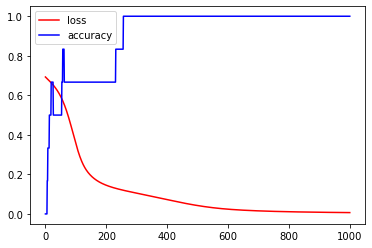

In [44]:
import matplotlib.pyplot as plt
y_loss = history.history['loss']
y_acc = history.history['accuracy']
plt.plot(np.arange(len(y_loss)), y_loss, c="red", label="loss")
plt.plot(np.arange(len(y_acc)), y_acc, c="blue", label="accuracy")
plt.legend(loc="best")
plt.show()

In [46]:
x_data = one_hot.copy()
x_data

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.]],

       [[0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.]]], dtype=float32)

In [50]:
y_data = np.array([1,0,1,0])

In [51]:
model = Sequential()
model.add(Input(shape=(3,9)))
model.add(LSTM(18))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 18)                2016      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 19        
Total params: 2,035
Trainable params: 2,035
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6743 - accuracy: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 993us/step - loss: 0.6713 - accuracy: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 996us/step - loss: 0.6703 - accuracy: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6672 - accuracy: 1.0000
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6661 - accuracy: 1.0000
Epoch 10/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6651 - accuracy: 1.0000
Epoch 11/1000
1/1

1/1 [==============================] - 0s 1ms/step - loss: 0.1890 - accuracy: 1.0000
Epoch 165/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1857 - accuracy: 1.0000
Epoch 166/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1824 - accuracy: 1.0000
Epoch 167/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1792 - accuracy: 1.0000
Epoch 168/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1761 - accuracy: 1.0000
Epoch 169/1000
1/1 [==============================] - 0s 999us/step - loss: 0.1730 - accuracy: 1.0000
Epoch 170/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1700 - accuracy: 1.0000
Epoch 171/1000
1/1 [==============================] - 0s 997us/step - loss: 0.1670 - accuracy: 1.0000
Epoch 172/1000
1/1 [==============================] - 0s 999us/step - loss: 0.1641 - accuracy: 1.0000
Epoch 173/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1613 - accuracy: 1.0000
Epoch 174/

1/1 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 1.0000
Epoch 327/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 1.0000
Epoch 328/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0210 - accuracy: 1.0000
Epoch 329/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 1.0000
Epoch 330/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 1.0000
Epoch 331/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0205 - accuracy: 1.0000
Epoch 332/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0204 - accuracy: 1.0000
Epoch 333/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 1.0000
Epoch 334/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0200 - accuracy: 1.0000
Epoch 335/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0199 - accuracy: 1.0000
Epoch 336/1000
1

1/1 [==============================] - 0s 999us/step - loss: 0.0082 - accuracy: 1.0000
Epoch 489/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0082 - accuracy: 1.0000
Epoch 490/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 491/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0081 - accuracy: 1.0000
Epoch 492/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 493/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0080 - accuracy: 1.0000
Epoch 494/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0080 - accuracy: 1.0000
Epoch 495/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0079 - accuracy: 1.0000
Epoch 496/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0079 - accuracy: 1.0000
Epoch 497/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0079 - accuracy: 1.0000
Epoch 498/1000
1/

1/1 [==============================] - 0s 0s/step - loss: 0.0046 - accuracy: 1.0000
Epoch 651/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 652/1000
1/1 [==============================] - 0s 996us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 653/1000
1/1 [==============================] - 0s 79us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 654/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0045 - accuracy: 1.0000
Epoch 655/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 656/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 657/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 658/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 659/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 1000us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 813/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 814/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0029 - accuracy: 1.0000
Epoch 815/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0029 - accuracy: 1.0000
Epoch 816/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 817/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 818/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 819/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0029 - accuracy: 1.0000
Epoch 820/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0029 - accuracy: 1.0000
Epoch 821/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 975/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 976/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0021 - accuracy: 1.0000
Epoch 977/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 978/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 979/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 980/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 981/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0021 - accuracy: 1.0000
Epoch 982/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 983/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0020 - accuracy: 1.0000
Epoch 984

In [53]:
from tensorflow.keras.datasets import mnist

In [55]:
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [56]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

In [58]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import Flatten, Reshape

In [69]:
autoencoder = Sequential()
autoencoder.add(Input(shape=(28,28,1)))
autoencoder.add(Conv2D(16, kernel_size=3, padding='same',activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, padding='same',activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))

autoencoder.add(Conv2D(4, kernel_size=3, padding='same',activation='relu'))

autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same',activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, padding='same',activation='relu'))
autoencoder.add(Conv2D(1, kernel_size=3, padding='same',activation='sigmoid'))

autoencoder.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 7, 7, 4)           292       
_________________________________________________________________
up_sampling2d_10 (UpSampling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 8)       

In [72]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, validation_data=(x_test, x_test), 
                batch_size=512, epochs=50)

Epoch 1/50
118/118 [==============================] - 25s 210ms/step - loss: 0.0866 - val_loss: 0.0841
Epoch 2/50
118/118 [==============================] - 25s 211ms/step - loss: 0.0848 - val_loss: 0.0835
Epoch 3/50
118/118 [==============================] - 25s 210ms/step - loss: 0.0841 - val_loss: 0.0827
Epoch 4/50
118/118 [==============================] - 25s 210ms/step - loss: 0.0833 - val_loss: 0.0819
Epoch 5/50
118/118 [==============================] - 25s 210ms/step - loss: 0.0825 - val_loss: 0.0812
Epoch 6/50
118/118 [==============================] - 25s 210ms/step - loss: 0.0816 - val_loss: 0.0803
Epoch 7/50
118/118 [==============================] - 25s 209ms/step - loss: 0.0807 - val_loss: 0.0794
Epoch 8/50
118/118 [==============================] - 25s 209ms/step - loss: 0.0798 - val_loss: 0.0785
Epoch 9/50
118/118 [==============================] - 25s 211ms/step - loss: 0.0788 - val_loss: 0.0778
Epoch 10/50
118/118 [==============================] - 25s 210ms/step - l

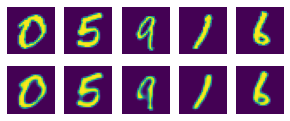

In [77]:
random_test = np.random.randint(x_test.shape[0], size=5)
ae_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(7,2))
for i, image_idx in enumerate(random_test):
    ax = plt.subplot(2,7,i+1)
    plt.imshow(x_test[image_idx].reshape(28,28))    
    ax.axis('off')
    ax = plt.subplot(2,7,7+i+1)
    plt.imshow(ae_imgs[image_idx].reshape(28,28))
    ax.axis('off')
plt.show()

In [78]:
embed = autoencoder.get_weights()
embed

[array([[[[-6.81627833e-04, -1.43598896e-02,  1.34065434e-01,
            1.93279106e-02, -5.73957801e-01, -9.18163881e-02,
            6.22183271e-02,  1.78472698e-02,  1.54349327e-01,
           -1.80946469e-01,  6.54852241e-02, -7.01544285e-02,
            1.95020616e-01,  1.06987461e-01, -1.80624649e-02,
            1.43332645e-01]],
 
         [[-2.66149472e-02,  3.13619047e-01, -2.82589048e-02,
            3.66126657e-01, -1.12092769e+00, -1.45175960e-02,
            1.57933906e-01,  7.23520517e-02,  3.00707761e-02,
           -3.50469738e-01,  7.20819384e-02, -2.94903845e-01,
            8.98737013e-02, -4.11962897e-01, -1.44443065e-02,
           -7.37264678e-02]],
 
         [[ 7.55640119e-02, -3.48064653e-03, -5.85489348e-02,
            1.45050704e-01, -4.29644257e-01, -1.55607447e-01,
            1.35456979e-01, -1.75687045e-01,  8.63240883e-02,
           -3.46562773e-01, -2.40349327e-04, -3.90414335e-02,
            8.18774253e-02, -1.55782074e-01,  1.25653028e-01,
      